In [1]:
#importing modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
# Loading the stock data into data
data = pd.read_csv('stock_data.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
# Extracting the 'Close' prices
close_prices = data['Close'].values.reshape(-1, 1)

In [5]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

In [6]:
# Split the data into training and testing sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [7]:
# Creating sequences of data
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Number of previous days to use for prediction
sequence_length = 20 

In [8]:
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
75/75 [==============================] - 6s 15ms/step - loss: 0.0042
Epoch 2/20
75/75 [==============================] - 1s 14ms/step - loss: 4.3988e-04
Epoch 3/20
75/75 [==============================] - 1s 14ms/step - loss: 4.2291e-04
Epoch 4/20
75/75 [==============================] - 1s 13ms/step - loss: 3.8828e-04
Epoch 5/20
75/75 [==============================] - 1s 14ms/step - loss: 3.6755e-04
Epoch 6/20
75/75 [==============================] - 1s 14ms/step - loss: 3.5094e-04
Epoch 7/20
75/75 [==============================] - 1s 14ms/step - loss: 3.3033e-04
Epoch 8/20
75/75 [==============================] - 1s 13ms/step - loss: 3.2720e-04
Epoch 9/20
75/75 [==============================] - 1s 13ms/step - loss: 2.7544e-04
Epoch 10/20
75/75 [==============================] - 1s 13ms/step - loss: 2.7207e-04
Epoch 11/20
75/75 [==============================] - 1s 13ms/step - loss: 2.6907e-04
Epoch 12/20
75/75 [==============================] - 1s 14ms/step - loss: 2.87

In [11]:
# Make predictions on the test data
predictions = model.predict(X_test)

19/19 [==============================] - 1s 7ms/step


In [12]:
# Inverse the scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

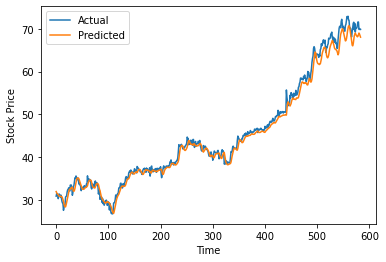

In [13]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()